In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [29]:
FILE_PATH = os.path.join(os.path.sep, os.getcwd(), 'source', '')

In [30]:
# Получаем список нужных имен файлов
file_list = os.listdir(path=FILE_PATH)
need_files = list()
years = list()
for i in range(1900, 2001, 5):
    for x in file_list:
        if str(i) in x:
            need_files.append(x)
            years.append(i)

In [31]:
frame = pd.DataFrame()
cols = ['name', 'gender', 'value']  
my_list = []
for file in need_files:
    df = pd.read_csv(FILE_PATH + file, index_col=None, header=None, names=cols)
    my_list.append(df)
    frame = pd.concat(my_list, keys=years, names=['year', 'id'])
    new = frame.groupby(['year', 'name'])['value'].sum()

In [32]:
mainframe = pd.DataFrame(new)
mainframe = mainframe.groupby(['year', 'name']).sum().query("name == ['Ruth', 'Robert']").unstack('name')

In [33]:
mainframe.head(10)

value         
name   Robert     Ruth
year                  
1900   3845.0   4781.0
1905   3431.0   5088.0
1910   5638.0   7247.0
1915  28854.0  21924.0
1920  48883.0  26155.0
1925  61246.0  22325.0
1930  62572.0  15010.0
1935  56755.0  10041.0
1940  61401.0   8922.0
1945  70132.0   8063.0

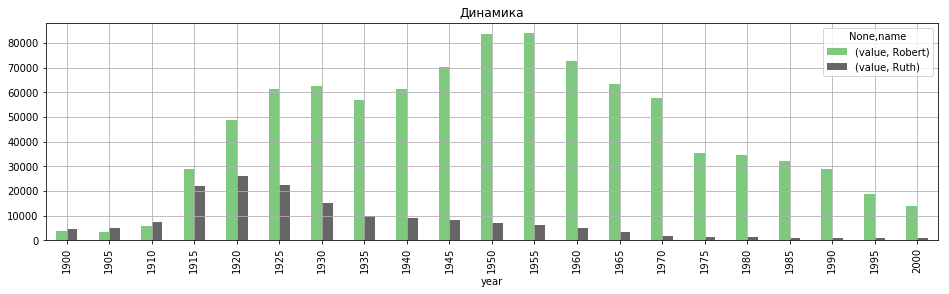

In [34]:
plt.rcParams["figure.figsize"] = (16,4)
mainframe.plot.bar(title='Динамика', grid=True, colormap='Accent')